In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Dropout, Flatten, BatchNormalization
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the training datasets for DP and NDP
train_dp = pd.read_csv(r'G:\DataSet\train\trainDP.csv')
train_ndp = pd.read_csv(r'G:\DataSet\train\trainNDP.csv')

# Load the testing datasets for DP and NDP
test_dp = pd.read_csv(r'G:\DataSet\test\testDP.csv')
test_ndp = pd.read_csv(r'G:\DataSet\test\testNDP.csv')

# Combine DP and NDP datasets for training and testing
train_data = pd.concat([train_dp, train_ndp], ignore_index=True)
test_data = pd.concat([test_dp, test_ndp], ignore_index=True)

# Drop problematic columns
train_data = train_data.drop(columns=['FFT', 'Power spectral density'])
test_data = test_data.drop(columns=['FFT', 'Power spectral density'])

# Separate features and target variable for training data
X_train = train_data.drop(columns=['Class']).values
y_train = train_data['Class'].values

# Separate features and target variable for testing data
X_test = test_data.drop(columns=['Class']).values
y_test = test_data['Class'].values

# Encode target variable into numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define RCNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape input data to fit the 3D input shape required by Conv1D layer
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model with 50 epochs
model.fit(X_train, y_train_encoded, epochs=50, batch_size=64)

# Make predictions on the testing data
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Decode the predicted labels back to original string representations
y_pred_decoded = label_encoder.inverse_transform(y_pred.flatten())

# Generate classification report
report = classification_report(y_test, y_pred_decoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_decoded)

print("Accuracy:", accuracy)
print(report)


Epoch 1/50
12/12 [==============================] - 3s 16ms/step - loss: 0.5696 - accuracy: 0.7154
Epoch 2/50
12/12 [==============================] - 0s 15ms/step - loss: 0.4588 - accuracy: 0.8148
Epoch 3/50
12/12 [==============================] - 0s 23ms/step - loss: 0.4382 - accuracy: 0.8309
Epoch 4/50
12/12 [==============================] - 0s 20ms/step - loss: 0.4127 - accuracy: 0.8523
Epoch 5/50
12/12 [==============================] - 0s 41ms/step - loss: 0.3853 - accuracy: 0.8550
Epoch 6/50
12/12 [==============================] - 0s 26ms/step - loss: 0.4096 - accuracy: 0.8564
Epoch 7/50
12/12 [==============================] - 0s 16ms/step - loss: 0.4189 - accuracy: 0.8376
Epoch 8/50
12/12 [==============================] - 0s 15ms/step - loss: 0.3973 - accuracy: 0.8470
Epoch 9/50
12/12 [==============================] - 0s 16ms/step - loss: 0.3942 - accuracy: 0.8577
Epoch 10/50
12/12 [==============================] - 0s 15ms/step - loss: 0.3864 - accuracy: 0.8550
Epoch 11/

In [10]:
# Print model architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 16, 64)            256       
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 8, 64)             0         
 g1D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 8, 64)             256       
 chNormalization)                                                
                                                                 
 lstm_4 (LSTM)               (None, 8, 64)             33024     
                                                                 
 dropout_6 (Dropout)         (None, 8, 64)             0         
                                                                 
 flatten_4 (Flatten)         (None, 512)              

In [12]:
pip install pydot


  Obtaining dependency information for pydot from https://files.pythonhosted.org/packages/7f/90/c9b51f3cdff89cd8f93382060330f43d1af098a6624cff439e700791e922/pydot-2.0.0-py3-none-any.whl.metadata


Epoch 1/50
12/12 [==============================] - 6s 17ms/step - loss: 0.5354 - accuracy: 0.7477
Epoch 2/50
12/12 [==============================] - 0s 16ms/step - loss: 0.4137 - accuracy: 0.8403
Epoch 3/50
12/12 [==============================] - 0s 17ms/step - loss: 0.3924 - accuracy: 0.8523
Epoch 4/50
12/12 [==============================] - 0s 16ms/step - loss: 0.3997 - accuracy: 0.8430
Epoch 5/50
12/12 [==============================] - 0s 20ms/step - loss: 0.3921 - accuracy: 0.8456
Epoch 6/50
12/12 [==============================] - 0s 18ms/step - loss: 0.3681 - accuracy: 0.8685
Epoch 7/50
12/12 [==============================] - 0s 17ms/step - loss: 0.3842 - accuracy: 0.8483
Epoch 8/50
12/12 [==============================] - 0s 15ms/step - loss: 0.3765 - accuracy: 0.8577
Epoch 9/50
12/12 [==============================] - 0s 17ms/step - loss: 0.3759 - accuracy: 0.8550
Epoch 10/50
12/12 [==============================] - 0s 18ms/step - loss: 0.3524 - accuracy: 0.8604
Epoch 11/

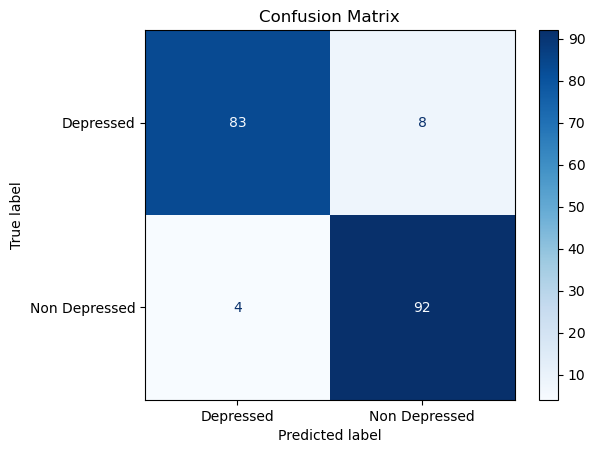

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Dropout, Flatten, BatchNormalization, Bidirectional
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the training datasets for DP and NDP
train_dp = pd.read_csv(r'G:\DataSet\train\trainDP.csv')
train_ndp = pd.read_csv(r'G:\DataSet\train\trainNDP.csv')

# Load the testing datasets for DP and NDP
test_dp = pd.read_csv(r'G:\DataSet\test\testDP.csv')
test_ndp = pd.read_csv(r'G:\DataSet\test\testNDP.csv')

# Combine DP and NDP datasets for training and testing
train_data = pd.concat([train_dp, train_ndp], ignore_index=True)
test_data = pd.concat([test_dp, test_ndp], ignore_index=True)

# Drop problematic columns
train_data = train_data.drop(columns=['FFT', 'Power spectral density'])
test_data = test_data.drop(columns=['FFT', 'Power spectral density'])

# Separate features and target variable for training data
X_train = train_data.drop(columns=['Class']).values
y_train = train_data['Class'].values

# Separate features and target variable for testing data
X_test = test_data.drop(columns=['Class']).values
y_test = test_data['Class'].values

# Encode target variable into numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define Bi-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape input data to fit the 3D input shape required by Conv1D layer
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model with 50 epochs
model.fit(X_train, y_train_encoded, epochs=50, batch_size=64)

# Make predictions on the testing data
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Decode the predicted labels back to original string representations
y_pred_decoded = label_encoder.inverse_transform(y_pred.flatten())

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_decoded)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


15/15 [==============================] - 0s 2ms/step


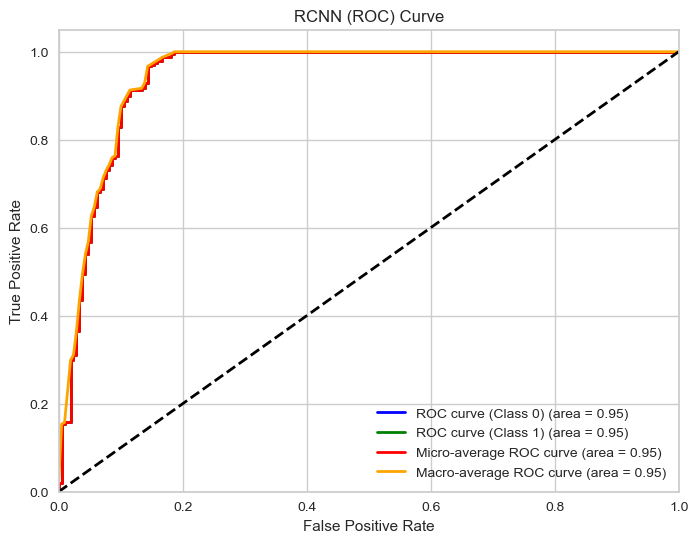

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from yellowbrick.classifier import ROCAUC
import tensorflow as tf

# Generate synthetic data for demonstration with different parameters
X, y = make_classification(n_samples=1500, n_features=25, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define your RCNN model using TensorFlow or any deep learning framework
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, verbose=0)

# Predict probabilities on the test set
y_pred_proba = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test.ravel(), y_pred_proba.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 2
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], color='blue', lw=2, label='ROC curve (Class 0) (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green', lw=2, label='ROC curve (Class 1) (area = %0.2f)' % roc_auc[1])
plt.plot(fpr_micro, tpr_micro, color='red', lw=2, label='Micro-average ROC curve (area = %0.2f)' % roc_auc_micro)
plt.plot(fpr_macro, tpr_macro, color='orange', lw=2, label='Macro-average ROC curve (area = %0.2f)' % roc_auc_macro)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RCNN (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


7/7 [==============================] - 0s 2ms/step


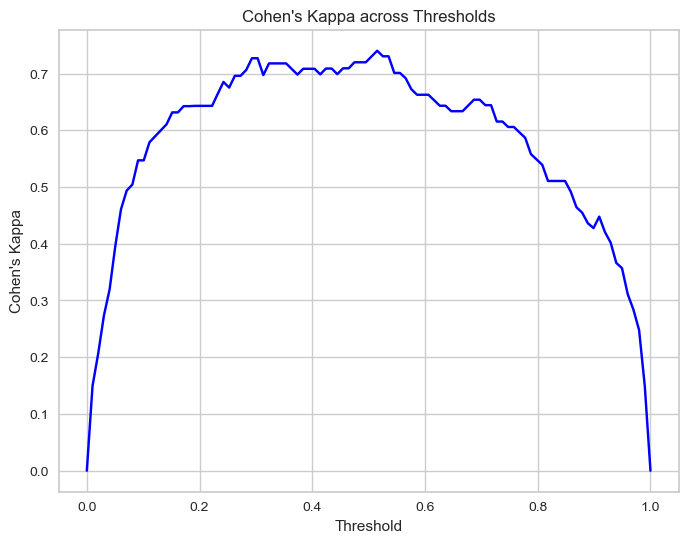

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your RCNN model using TensorFlow or any deep learning framework
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, verbose=0)

# Varying thresholds (for example, changing the decision threshold for binary classification)
thresholds = np.linspace(0, 1, 100)
kappas = []

# Calculate Cohen's Kappa for each threshold
for threshold in thresholds:
    y_pred_proba = model.predict(X_test)
    y_pred_threshold = (y_pred_proba > threshold).astype(int)
    kappa = cohen_kappa_score(y_test, y_pred_threshold)
    kappas.append(kappa)

# Plot Cohen's Kappa across thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, kappas, color='blue')
plt.title("Cohen's Kappa across Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Cohen's Kappa")
plt.grid(True)
plt.show()


In [1]:
import numpy as np
from sklearn.metrics import cohen_kappa_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your RCNN model using TensorFlow or any deep learning framework
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, verbose=0)

# Varying thresholds (for example, changing the decision threshold for binary classification)
thresholds = np.linspace(0, 1, 100)
kappas = []

# Calculate Cohen's Kappa for each threshold
for threshold in thresholds:
    y_pred_proba = model.predict(X_test)
    y_pred_threshold = (y_pred_proba > threshold).astype(int)
    kappa = cohen_kappa_score(y_test, y_pred_threshold)
    kappas.append(kappa)

# Find the threshold with maximum Cohen's Kappa
max_kappa_index = np.argmax(kappas)
max_kappa_threshold = thresholds[max_kappa_index]
max_kappa_value = kappas[max_kappa_index]

print("Maximum Cohen's Kappa:")
print("Threshold:", max_kappa_threshold)
print("Value:", max_kappa_value)


7/7 [==============================] - 0s 524us/step
Maximum Cohen's Kappa:
Threshold: 0.5151515151515152
Value: 0.7401818726891176
